In [1]:
import pandas as pd
import numpy as np

In [2]:
bike = pd.read_csv("bike_rental.csv")
bike.head(2)

datetime  casual  registered  count
0  2011-01-01 00:00:00       3          13     16
1  2011-01-01 01:00:00       8          32     40

In [3]:
bike["count_MA_3H"] = bike["count"].rolling(window = 3).mean()
bike["count_EWMA_a01"] = bike["count"].ewm(alpha = 0.1).mean()
bike["count_EWMA_a09"] = bike["count"].ewm(alpha = 0.9).mean()
bike.head()

datetime  casual  registered  count  count_MA_3H  \
0  2011-01-01 00:00:00       3          13     16          NaN   
1  2011-01-01 01:00:00       8          32     40          NaN   
2  2011-01-01 02:00:00       5          27     32    29.333333   
3  2011-01-01 03:00:00       3          10     13    28.333333   
4  2011-01-01 04:00:00       0           1      1    15.333333   

   count_EWMA_a01  count_EWMA_a09  
0       16.000000       16.000000  
1       28.631579       37.818182  
2       29.874539       32.576577  
3       24.967723       14.955896  
4       19.114942        2.395464

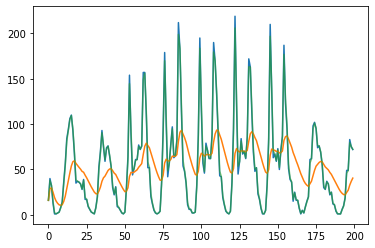

In [9]:
bike["count"][:200].plot()
bike["count_EWMA_a01"][:200].plot()
bike["count_EWMA_a09"][:200].plot(alpha = 0.6)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, ]

In [13]:
df["TM"] = pd.to_datetime(df["TM"])
# 필요시 정렬 코드 추가!!
df = df.set_index("TM")

In [14]:
result = seasonal_decompose(df["TA"], model = "additive")

In [23]:
result.plot()

In [ ]:
result.trend
result.seasonal
result.resid

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
bike = pd.read_csv("bike_rental.csv")
bike.head(2)

In [32]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7,
                                         random_state = 123)
bike_train.head(2)

datetime  casual  registered  count
10675  2012-12-11 05:00:00       1          40     41
7978   2012-06-12 19:00:00      47         444    491

In [28]:
len(bike_train)

7620

In [34]:
score = pd.read_csv("class_scores.csv")
score.head(2)

Stu_ID  grade class gender  Math  English  Science  Marketing  Writing
0   10101      1     A      M    55       84       50         40       59
1   10102      1     A      M    29       94       41         87       57

In [35]:
score_sub = score.loc[:1, "Math":].transpose()
score_sub

0   1
Math       55  29
English    84  94
Science    50  41
Marketing  40  87
Writing    59  57

In [36]:
score_sub["diff"] = score_sub[1] - score_sub[0]
score_sub

0   1  diff
Math       55  29   -26
English    84  94    10
Science    50  41    -9
Marketing  40  87    47
Writing    59  57    -2

In [39]:
(score_sub["diff"] ** 2).sum() ** 0.5

55.40758070878027

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [42]:
iris = pd.read_csv("iris_xlsx.csv")
iris.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [43]:
nor_mm = MinMaxScaler().fit(iris.iloc[:, :-1])
nor_mm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
iris_mm = nor_mm.transform(iris.iloc[:, :-1])
iris_mm[:2, ]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667]])

In [46]:
df_iris_mm = pd.DataFrame(iris_mm,
                          columns = iris.columns[:4])
df_iris_mm.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667

In [47]:
df_iris_mm.min()
df_iris_mm.max()

Sepal.Length    1.0
Sepal.Width     1.0
Petal.Length    1.0
Petal.Width     1.0
dtype: float64

In [48]:
iris.iloc[:2, :-1]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

In [50]:
MinMaxScaler().fit_transform(iris.iloc[:2, :-1])

array([[1., 1., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
nor_mm.transform(iris.iloc[:2, :-1])

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667]])

In [52]:
iris["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Q. iris 데이터의 virginica 데이터를 표준화 하고, 해당 규칙을 기준으로 versicolor 데이터를 표준화 하시오.

In [55]:
iris_vir = iris.loc[iris["Species"] == "virginica", :"Petal.Width"]
nor_std = StandardScaler().fit(iris_vir)

In [ ]:
iris_vir_nor = nor_std.transform(iris_vir)
df_iris_vir_nor = pd.DataFrame(iris_vir_nor, columns = iris_vir.columns[:4])
df_iris_vir_nor.head(2)

In [58]:
iris_ver = iris.loc[iris["Species"] == "versicolor", :"Petal.Width"]
iris_ver_nor = nor_std.transform(iris_ver)
df_iris_ver_nor = pd.DataFrame(iris_ver_nor, columns = iris_ver.columns[:4])
df_iris_ver_nor.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.654499     0.707897     -1.559446    -2.302404
1     -0.298655     0.707897     -1.925513    -1.934608

In [72]:
from sklearn.datasets import make_moons
x, Y = make_moons(n_samples = 200, noise = 0.2,
                  random_state = 123)
df_moon = pd.concat([pd.DataFrame(x, columns = ["x", "y"]),
                     pd.Series(Y)],
                    axis = 1)
# df_moon.head(2)

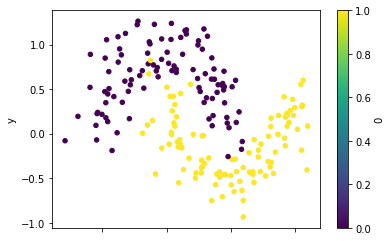

In [73]:
df_moon.plot.scatter(x = "x", y = "y", c = 0, colormap = "viridis")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [74]:
from sklearn.metrics import fbeta_score

In [ ]:
fbeta_score()

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
iris = pd.read_csv("iris_xlsx.csv")
iris.head(2)

In [77]:
model = KNeighborsRegressor(n_neighbors = 5).fit(X = iris.iloc[:, :3],
                                                 y = iris["Petal.Width"])
pred = model.predict(iris.iloc[:, :3])

In [78]:
pred[:3]

array([0.24, 0.18, 0.22])

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
mean_squared_error(y_true = iris["Petal.Width"], y_pred = pred) ** 0.5 # RMSE

0.14852160336687273

In [81]:
from sklearn.cluster import KMeans

In [83]:
X = iris.loc[:, :"Petal.Width"]

In [84]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 123).fit(X)

In [86]:
iris["cluster"] = kmeans.labels_
iris.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  cluster
0           5.1          3.5           1.4          0.2  setosa        0
1           4.9          3.0           1.4          0.2  setosa        0

In [87]:
pd.crosstab(iris["Species"], iris["cluster"])

cluster      0   1   2
Species               
setosa      50   0   0
versicolor   0   2  48
virginica    0  36  14

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
df = pd.read_csv("iris_xlsx.csv")
df.head(1)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa

In [91]:
X = df.drop("Species", axis = 1)
X.head(1)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2

In [92]:
cluster = AgglomerativeClustering(n_clusters = 3, 
                                  affinity = "manhattan",
                                  linkage = "single")

In [93]:
pred_cl = cluster.fit_predict(X)

In [94]:
pred_cl[:3]

array([1, 1, 1], dtype=int64)

In [96]:
df["cluster"] = pred_cl
df.head(1)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  cluster
0           5.1          3.5           1.4          0.2  setosa        1

In [97]:
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1  2
Species              
setosa       0  50  0
versicolor  50   0  0
virginica   49   0  1

In [99]:
df.groupby("cluster").mean() # centroid

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
cluster                                                      
0            6.275758     2.875758      4.910101     1.675758
1            5.006000     3.428000      1.462000     0.246000
2            4.900000     2.500000      4.500000     1.700000

In [100]:
from statsmodels.formula.api import ols

In [101]:
df = pd.read_csv("linear_regression_01.csv")
model = ols("y ~ x", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 10 Jun 2021   Prob (F-statistic):             0.0848
Time:                        14:31:53   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 10 Jun 2021   Prob (F-statistic):             0.0848
Time:                        14:34:57   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.2

In [104]:
df = pd.read_csv("bike.csv")
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [105]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour

In [106]:
model = ols("registered ~ weather + temp + humidity + holiday + hour",
            data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     694.5
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:05:39   Log-Likelihood:                -68559.
No. Observations:               10886   AIC:                         1.371e+05
Df Residuals:                   10880   BIC:                         1.372e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.2633      6.351      9.646      0.000      48.814      73.713
weather       -6.0025      2.191     -2.740      0.006     -10.297      -1.708
temp           5.1120      0.164     31.214      0.000       4.791       5.433
humidity      -1.2170      0.075    -16.224      0.000      -1.364      -1.070
holiday      -18.8635      7.568     -2.493      0.013     -33.698      -4.029
hour           6.5190      0.193     33.847      0.000       6.142       6.897
==============================================================================
Omnibus:                     3870.736   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13517.729
Skew:                           1.803   Prob(JB):                         0.00
Kurtosis:                       7.098   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
df.groupby("holiday")["registered"].mean().reset_index()

holiday  registered
0        0  156.094941
1        1  137.096463

In [ ]:
df.groupby("hour")["registered"].mean().reset_index()

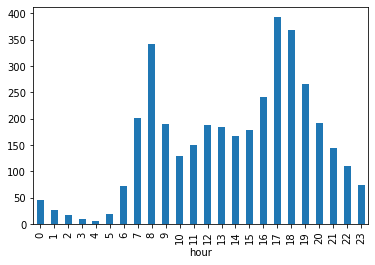

In [109]:
df.groupby("hour")["registered"].mean().plot.bar()

In [111]:
pred = model.predict(df) # formula로 변수를 지정하여 만들었기 때문에 가능!
pred[:4]

0     6.982789
1    10.527053
2    17.046098
3    33.842130
dtype: float64

In [112]:
model.params

Intercept    61.263250
weather      -6.002457
temp          5.111969
humidity     -1.217034
holiday     -18.863460
hour          6.519045
dtype: float64

In [113]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression(fit_intercept = True).fit(X = df[["temp", "hour"]],
                                                   y = df["registered"])

In [116]:
model.coef_

array([5.21292476, 7.45671599])

In [117]:
model.intercept_

-35.972303677220395

In [119]:
pred = model.predict(df[["temp", "hour"]])
pred[:3]

array([15.32287594, 18.50499362, 25.96170961])

In [ ]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

### Q. 다이아몬드의 가격을 예측하기 위해 carat, depth, table을 독립변수로 하는 선형회귀 모델을 생성하시오. 그리고 해당 모델을 활용하여 0.5 carat, 60 depth, 60 table 인 다이아몬드의 가격은 얼마인가?
※ 학습 데이터는 주어진 데이터의 70%를 사용하시오. <br>
※ 라이브러리는 statsmodels를 사용하시오. <br>
※ random_state는 123으로 지정 <br>
※ 가격은 정수만 기술하시오. <br>

In [121]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [ ]:
dia_train, dia_test = train_test_split(dia, train_size = 0.7, random_state = 123)
len(dia_train)

In [123]:
model = ols("price ~ carat + depth + table", data = dia_train).fit()

In [124]:
dia_test_1 = pd.DataFrame({"carat": [0.5],
                           "depth": [60],
                           "table": [60]})
pred = model.predict(dia_test_1)
pred

0    1593.490865
dtype: float64

In [129]:
df_resid = model.resid.reset_index().reset_index()
df_resid.head(2)

level_0  index           0
0        0  13934 -564.145923
1        1  38054   23.213599

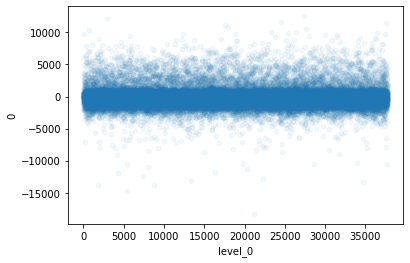

In [132]:
df_resid.plot.scatter(x = "level_0", y = 0, alpha = 0.05)

In [133]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [134]:
dia_dum_1 = pd.get_dummies(dia, columns = ["cut"],
                           drop_first = True)
dia_dum_1.head(2)

carat color clarity  depth  table  price     x     y     z  cut_Good  \
0   0.23     E     SI2   61.5   55.0    326  3.95  3.98  2.43         0   
1   0.21     E     SI1   59.8   61.0    326  3.89  3.84  2.31         0   

   cut_Ideal  cut_Premium  cut_Very Good  
0          1            0              0  
1          0            1              0

### Q. 다이아몬드 가격을 예측하기 위하여, carat, cut, table 변수를 활용하여 다중선형회귀분석을 실시하시오. 그리고 해당 모델을 기반으로 1 carat, "Ideal" cut, 55 table 인 다이아몬드의 가격을 예측하시오.
※ 명목형 변수는 One-Hot Encoding을 실시하시오. <br>
※ 모델 생성시 가변수는 하나 제외하시오. <br>
※ clarity가 "SI2"인 다이아몬드를 대상으로 분석을 실시하시오. <br>
※ train 데이터의 비율은 80%로 하시오 <br>
※ random_state는 100으로 하시오. <br>
※ 다이아몬드 가격은 정수만 기술하시오.

In [ ]:
dia_sub = dia.loc[dia["clarity"] == "SI2", ["price", "carat", "table", "cut"]]
dia_sub.head(2)

In [ ]:
dia_sub_dum = pd.get_dummies(dia_sub, drop_first = True)
dia_sub_dum.head(2)

In [ ]:
dia_train, dia_test = train_test_split(dia_sub_dum, train_size = 0.8,
                                       random_state = 100)
len(dia_train)

In [144]:
dia_train = dia_train.rename(columns = {"cut_Very Good": "cut_Very_Good"})

In [145]:
formula = "price ~ " + " + ".join(dia_train.columns[1:])
formula

'price ~ carat + table + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good'

In [147]:
model = ols(formula, data = dia_train).fit()
# model.summary()

In [148]:
dia_train.head(1)

price  carat  table  cut_Good  cut_Ideal  cut_Premium  cut_Very_Good
12449   5243   1.21   60.0         0          0            1              0

 1 carat, "Ideal" cut, 55 table

In [150]:
dia_test_1 = dia_train.head(1).reset_index(drop = True)
dia_test_1["carat"] = 1
dia_test_1["cut_Ideal"] = 1
dia_test_1["cut_Premium"] = 0
dia_test_1["table"] = 55
dia_test_1

price  carat  table  cut_Good  cut_Ideal  cut_Premium  cut_Very_Good
0   5243      1     55         0          1            0              0

In [151]:
model.predict(dia_test_1)

0    4729.093523
dtype: float64

In [152]:
from statsmodels.api import Logit

In [ ]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(2)

In [ ]:
df_dum = pd.get_dummies(df, columns = ["rank"], drop_first = True)
df_dum.head(2)

In [ ]:
model = Logit(df_dum["admit"], df_dum.drop("admit", axis = 1)).fit()
model.summary()

In [ ]:
pred = model.predict(df_dum.drop("admit", axis = 1))
pred[:4]

In [159]:
df_dum["pred"] = pred
df_dum["pred_class"] = (df_dum["pred"] > 0.5) + 0

In [160]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_true = df_dum["admit"], y_pred = df_dum["pred_class"])

0.695

In [163]:
from sklearn.metrics import roc_auc_score

In [166]:
roc_auc_score(df_dum["admit"], df_dum["pred"]) # OOOOOO

0.6631622970205648

In [167]:
roc_auc_score(df_dum["admit"], df_dum["pred_class"]) # XXXXXXX

0.5786392085604685

In [168]:
model.params

gre       0.001387
gpa      -0.133576
rank_2   -0.966281
rank_3   -1.545069
rank_4   -1.877592
dtype: float64

In [169]:
import numpy as np

In [170]:
np.exp(model.params) # OR

gre       1.001388
gpa       0.874961
rank_2    0.380495
rank_3    0.213297
rank_4    0.152958
dtype: float64

In [172]:
from sklearn.tree import DecisionTreeClassifier # 분류나무
from sklearn.tree import DecisionTreeRegressor # 회귀나무

In [173]:
df = pd.read_csv("classification_data_01.csv")
df.head(2)

Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0

In [176]:
model = DecisionTreeClassifier(max_depth = 3,
                               random_state = 123).fit(X = df.drop("Class", axis = 1),
                                                       y = df["Class"])

In [177]:
y_pred = model.predict(df.drop("Class", axis = 1))
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [178]:
pd.crosstab(df["Class"], y_pred)

col_0    0    1
Class          
0      723   39
1       45  565